# homework 5 part 2

In [1]:
# Imports and magics


# Problem 4

(20pt)

**In this problem you will be working with the [Breast Cancer Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).**

**This data set contains 569 samples of digitized images of a fine needle aspirate (FNA) of a breast mass. Each sample describes the mass using 30 features, which include the average radius of the cell present in the FNA image. 
Each sample is labeled as benign (class = 1) or malignant (class = 0).**

**We will use the ```scikit-learn``` library to load it and write it as a pandas dataframe:**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(return_X_y = False)
# print(data.DESCR) # uncomment this to learn more about this dataset

df = pd.DataFrame(data = np.hstack((data.target[:,np.newaxis], data.data)),
                      columns = np.concatenate((['Class'],data.feature_names)))
df

,Class,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**For each class (benign and malignant), consider the mean radius column. Answer the following questions:**

**Consider the mean radius feature (second column in dataframe) for both benign (class=1) and malignant (class=0) samples. Answer the following questions:**

1. (2 pt) **Plot overlapping histograms of the two types of samples (malignant and benign).**

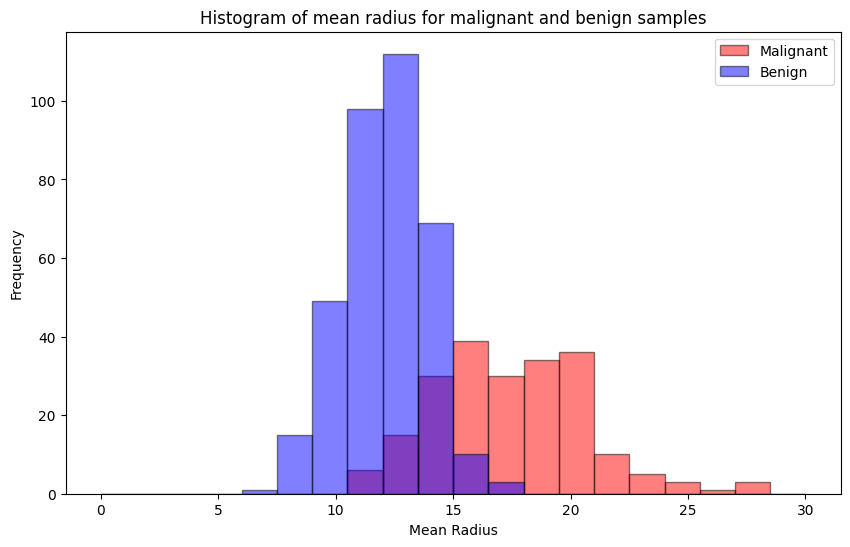

In [14]:
#1)
malignant = df[df['Class'] == 0]
benign = df[df['Class'] == 1]

plt.figure(figsize = (10,6))

plt.hist(malignant['mean radius'], bins=20, color='red', alpha=0.5, label='Malignant', edgecolor='black', range = (0,30))
plt.hist(benign['mean radius'], bins=20, color='blue', alpha=0.5, label='Benign', edgecolor='black', range = (0,30))

plt.title('Histogram of mean radius for malignant and benign samples')
plt.xlabel('Mean Radius')
plt.ylabel("Frequency")
plt.legend()

2. (4pt) **Assume that the two groups follow a Gaussian distribution. Estimate the parameters of each distribution using unbiased estimators from the sample data.**

In [51]:
num_sims = 1000
MalignantMeanEstimator = np.zeros(num_sims)
Totalsum = 0
for k in range(num_sims):
    vals = np.random.choice(malignant['mean radius'], k + 1)
    avg = np.mean(vals)
    Totalsum += avg
    MalignantMeanEstimator[k] = avg


malignantMean = Totalsum/ num_sims
print("The estimated mean for malignant samples using unbiased estimators is: ", malignantMean)

num_sims = 1000
BenignMeanEstimator = np.zeros(num_sims)
Totalsum = 0
for k in range(num_sims):
    vals = np.random.choice(benign['mean radius'], k + 1)
    avg = np.mean(vals)
    Totalsum += avg
    BenignMeanEstimator[k] = avg

benignMean = Totalsum / num_sims
print("The estimated mean for malignant samples using unbiased estimators is: ", benignMean)

The estimated mean for malignant samples using unbiased estimators is:  17.47666636591462
The estimated mean for malignant samples using unbiased estimators is:  12.14834114099654


In [52]:
num_sims = 1000
MalignantVarianceEstimator = np.zeros(num_sims)
TotalVar = 0
for k in range(num_sims):
    vals = np.random.choice(malignant['mean radius'], k + 1)
    avg = np.mean(vals)
    var = np.sum((vals - avg)**2)/(k+1)
    TotalVar += var
    MalignantVarianceEstimator[k] = var


malignantVar = TotalVar / num_sims
print("The estimated mean of the sample-variance estimator for malignant samples is: ", malignantVar)


num_sims = 1000
benignVarianceEstimator = np.zeros(num_sims)
TotalVar = 0
for k in range(num_sims):
    vals = np.random.choice(benign['mean radius'], k + 1)
    avg = np.mean(vals)
    var = np.sum((vals - avg)**2)/(k+1)
    TotalVar += var
    benignVarianceEstimator[k] = var

benignVar = TotalVar / num_sims
print("The estimated mean of the sample-variance estimator for benign samples is: ", benignVar)

The estimated mean of the sample-variance estimator for malignant samples is:  10.150457699383347
The estimated mean of the sample-variance estimator for benign samples is:  3.1451531344181904


In [76]:
# Estimating mean and variance for malignant samples
malignant_mean = np.mean(malignant['mean radius'])
malignant_variance = np.var(malignant['mean radius'], ddof=1)  # using ddof=1 for unbiased estimator of variance
print("Estimated mean for malignant samples:", malignant_mean)
print("Estimated variance for malignant samples:", malignant_variance)

# Estimating mean and variance for benign samples
benign_mean = np.mean(benign['mean radius'])
benign_variance = np.var(benign['mean radius'], ddof=1)
print("Estimated mean for benign samples:", benign_mean)
print("Estimated variance for benign samples:", benign_variance)


Estimated mean for malignant samples: 17.462830188679245
Estimated variance for malignant samples: 10.26543081462935
Estimated mean for benign samples: 12.146523809523808
Estimated variance for benign samples: 3.1702217220438738


3. (4 pt) **Plot the resulting Gaussian distributions overlapping with the previous histogram plot and comment the results.**

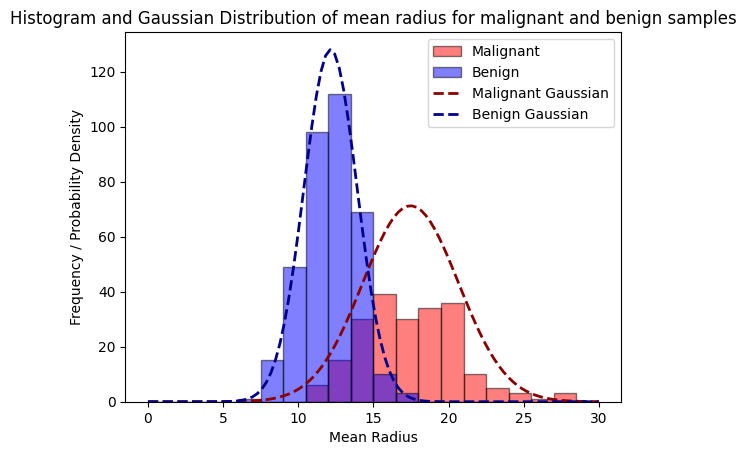

In [82]:


# Plot histogram as before
plt.hist(malignant['mean radius'], bins=20, color='red', alpha=0.5, label='Malignant', edgecolor='black', range=(0, 30))
plt.hist(benign['mean radius'], bins=20, color='blue', alpha=0.5, label='Benign', edgecolor='black', range=(0, 30))

# Plot Gaussian distributions
x = np.linspace(0, 30, 100)
plt.plot(x, stats.norm.pdf(x, malignantMean, np.sqrt(malignantVar)) * 569, color='darkred', linestyle='--', linewidth=2, label='Malignant Gaussian')
plt.plot(x, stats.norm.pdf(x, benignMean, np.sqrt(benignVar)) * 569, color='darkblue', linestyle='--', linewidth=2, label='Benign Gaussian')

plt.title('Histogram and Gaussian Distribution of mean radius for malignant and benign samples')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency / Probability Density')
plt.legend()

plt.show()

Comments: We can see that the benign tumour matches its gaussian distribution more then the malignant tumor samples as it has a more of a bell shaped curve. We also see that benign distribution is narrower then the malignant distribution as the benign distribtuion has a smaller variance.

4. (10 pt) **For which value of raidus you would use to determine if benign or malignant, such that a probability of miss equal to 0.05?**

Probability of miss detection = P(decide benigh|class = 0)

In [119]:
thresholdRadius = stats.norm.ppf(0.95, benignMean, np.sqrt(benignVar))
CorrectDetectionProb = stats.norm.cdf(thresholdRadius, benignMean, np.sqrt(benignVar))

print("Threshold radius,: ", thresholdRadius)
print("Probability of a miss: ", 1 - CorrectDetectionProb)


Threshold radius,:  15.065419898067182
Probability of a miss:  0.95


# Problem 5

(30pt)
**Consider the weather data provided to you in the file "miamiweather.csv". This data contains monthly and annual temperature recorded in Miami, Florida from 1927 to 2019.**

**Answer the following questions:**

1. (2 pt )**Load this data using pandas.**

In [120]:
#1)
data = pd.read_csv("miamiweather.csv")

2. (2 pt) **Plot the year vs the annual temperature in Miami.**

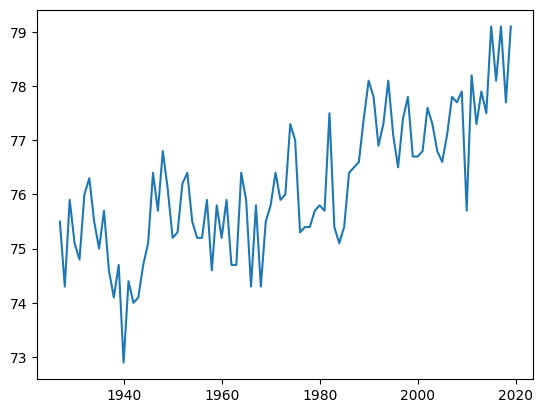

In [123]:
plt.plot(data['Year'], data['Annual'])

3. (2 pt) **Comment your observations from the plot in (2).**

3. I observe that as time went on, the average annual temperature increased. Although the changes were volatile from the year, the general trend is that increased.

4. (4pt)**Create an array with the temperatures for two groups: group 1 for years 1927 to 1973, and group 2 for years 1974 to 2019. Calculate the mean temperature for each group and the correspondent mean difference.**

In [153]:
group1 = data[(data['Year'] >= 1927) & (data['Year'] <= 1973)]
group2 = data[(data['Year'] >= 1974) & (data['Year'] <= 2019)]

group1Mean = group1['Annual'].mean()
group2Mean = group2['Annual'].mean()

meanDifference = abs(group1Mean - group2Mean)

print(f"Mean of group 1: {group1Mean}")
print(f"Mean of group 2: {group2Mean}")
print(f"Difference of Means: {meanDifference}")



Mean of group 1: 75.31489361702128
Mean of group 2: 77.03478260869564
Difference of Means: 1.7198889916743525


5. (2pt)**Plot the temperature histogram for the resulting groups.**

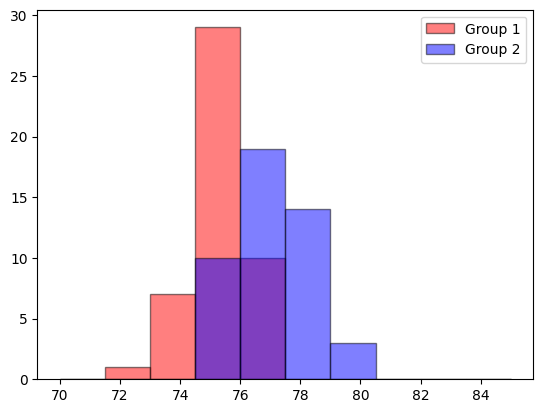

In [154]:
plt.hist(group1['Annual'], bins=10, color='red', alpha=0.5, label='Group 1', edgecolor='black', range=(70,85))
plt.hist(group2['Annual'], bins=10, color='Blue', alpha=0.5, label='Group 2', edgecolor='black', range=(70,85))
plt.legend()


6. (5pt)**Using the groups from part 5, perform a Bootstrap mean difference hypothesis test to verify if there is a real global warming. Consider a p-value of 0.01.** Recall this is what we learned using null hypothesis testing.

In [202]:
def bootstrap_test(data, group1, group2, column_name, numsims = 10000):
    pooled = data[column_name]
    group1Len = len(group1)
    group2Len = len(group1)
    diff = abs(group1[column_name].mean() - group2[column_name].mean())
    print(f"Observed difference in means is {diff:.2f}")
    differences = []
    count = 0
    for sim in range(numsims):
        bootstrapGroup1 = np.random.choice(pooled, group1Len)
        bootstrapGroup2 = np.random.choice(pooled, group2Len)

        bootstrap_t = bootstrapGroup1.mean() - bootstrapGroup2.mean()
        differences.append(bootstrap_t)
        if abs(bootstrap_t) >= diff:
            count+=1
    print(f"Probability of observing a differences as large as data is approximately {count / numsims}")
    return differences

bootstrap_test(data, group1, group2, 'Annual')

Observed difference in means is 1.72
Probability of observing a differences as large as data is approximately 0.0


[-0.2978723404255419,
 -0.5957446808510412,
 -0.36808510638299197,
 0.03617021276595267,
 -0.002127659574469476,
 -0.03191489361704214,
 0.10425531914894748,
 0.13404255319149172,
 -0.36170212765956933,
 -0.17446808510638334,
 -0.04042553191492004,
 0.05319148936170848,
 0.14893617021277805,
 0.29148936170213346,
 -0.18936170212764125,
 0.5808510638298117,
 0.09361702127658589,
 0.08085106382981166,
 -0.26808510638298344,
 0.22340425531915287,
 -0.008510638297877904,
 -0.19361702127659441,
 0.1340425531914775,
 -0.09574468085106957,
 -0.20851063829788075,
 0.36808510638299197,
 0.15957446808511122,
 0.3106382978723161,
 0.07872340425531377,
 -0.22978723404254708,
 -0.3723404255319309,
 0.29361702127658873,
 0.11489361702128065,
 -0.019148936170239494,
 0.555319148936178,
 0.631914893617008,
 0.24255319148934973,
 0.42978723404256414,
 1.4210854715202004e-14,
 -0.10638297872341695,
 0.17872340425535072,
 0.26808510638296923,
 0.159574468085097,
 -0.19361702127659441,
 0.0404255319149058

P value is less then significance level so therefore we reject null hypothesis and conclude that the observed difference is statisifcially significant.

7. (5pt)**Using the groups from problem 5, perform a binary hypothesis test to verify if there is a real global warming. Consider $\alpha=0.01$.** Test $H_0$: $\mu_x = \mu_y$ and $H_1$: $\mu_x \ne \mu_y$ where $\mu_x$ and $\mu_y$ are mean of the group 1 and group 2 respectively

In [180]:
def twosampleTtest(data, group1, group2, column_name, numsims = 10000):
        temp1 = group1[column_name]
        temp2 = group2[column_name]
        len1 = len(group1)
        len2 = len(group2)
        mean1 = np.mean(temp1)
        mean2 = np.mean(temp2)
        var1 = np.var(temp1, ddof = 1)
        var2 = np.var(temp2, ddof = 1)


        t_statistic = abs(mean1 - mean2)/(np.sqrt((var1/len1) + (var2/len2)))

        pval = (1 - stats.t.cdf(np.abs(t_statistic), len1 + len2 - 2)) * 2
        print(pval)

        print(f"The p value calculated is {pval}")

twosampleTtest(data, group1, group2, 'Annual')


6.705747068735946e-14
The p value calculated is 6.705747068735946e-14


Therefore, with p value less then signifance level, we reject null hypothesis

8. (8pt)**Draw histogram for the Bootstrap mean-difference of the annual temperature data. Generate 99% confidence intervals, and check if the observed difference lies in the 99% confidence intervals.**

Observed difference in means is 1.72
0
Probability of observing a differences as large as data is approximately 0.0


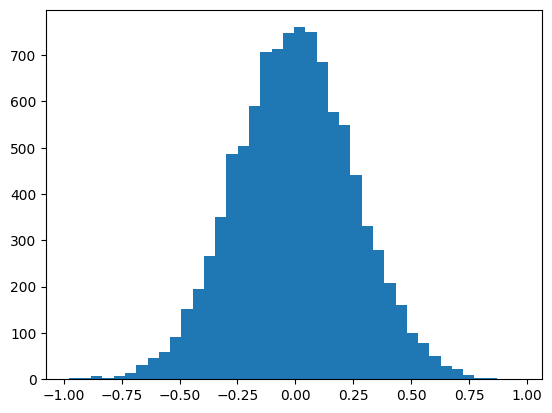

In [191]:
def bootstrap_test_hist(data, group1, group2, column_name, numsims = 10000):
    pooled = data[column_name]
    group1Len = len(group1)
    group2Len = len(group1)
    diff = abs(group1[column_name].mean() - group2[column_name].mean())
    print(f"Observed difference in means is {diff:.2f}")

    count = 0
    differences = []
    for sim in range(numsims):
        bootstrapGroup1 = np.random.choice(pooled, group1Len)
        bootstrapGroup2 = np.random.choice(pooled, group2Len)

        bootstrap_t = bootstrapGroup1.mean() - bootstrapGroup2.mean()
        differences.append(bootstrap_t)
        if abs(bootstrap_t) >= diff:
            count+=1
    print(count)
    print(f"Probability of observing a differences as large as data is approximately {count / numsims}")
    plt.hist(differences, bins = 40)

bootstrap_test_hist(data, group1, group2, 'Annual')

In [204]:
def findCI(data, C):
    n = len(data)

    alpha = (100 - C) / 2
    avg = np.mean(data)
    bs_sims = 1000
    bs_avgs = np.zeros(bs_sims)

    for bs_sim in range(bs_sims):
        bs_sample = np.random.choice(data, n)
        bs_avg = bs_sample.mean()
        bs_avgs[bs_sim] = bs_avg
    
    percentiles = np.percentile(bs_avgs, [alpha, 100-alpha])
    print(f'The mean estimate is {avg :.2f}')
    print(f'A {C}% confidence interval for the average is [{percentiles}]')

differences = bootstrap_test(data, group1, group2, 'Annual')
findCI(differences, 99)



Observed difference in means is 1.72
Probability of observing a differences as large as data is approximately 0.0
The mean estimate is -0.00
A 99% confidence interval for the average is [[-0.00781921  0.00478134]]


COMMENTS: Observed differences is not in the 99% confidence interval and therefore we reject the null hypothesis.